<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/19_Predicting_Stock_Price_based_on_Interest_Rates%2C_Employment_by_employing_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b63; overflow:hidden"><b> Predicting Stock Price based on Interest Rates, Employment by employing Multiple Linear Regression </b></div>



# Problem Statement

### WARNING: this project is low level very simle project for explaining Multiple linear regression

- We have dataset consisting of 3 columns, namely Interest Rates, Employment, S&P 500 Price
- Aim is to  predict  the Stock Price based on Interest Rates, Employment
- Also used evaluation model for accuracy

# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#

# *2.Import Dataset*

In [ ]:
df=pd.read_csv('/Users/maegbug/Desktop/Stock_Data.csv')
df.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


#

# *3.Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
df.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [ ]:
df.corr()

,Interest Rates,Employment,S&P 500 Price
Interest Rates,1.000000,-0.026890,0.898242
Employment,-0.026890,1.000000,0.283261
S&P 500 Price,0.898242,0.283261,1.000000


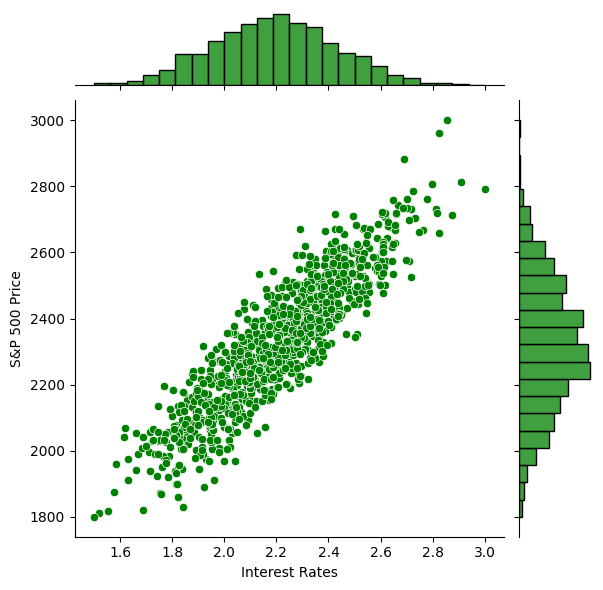

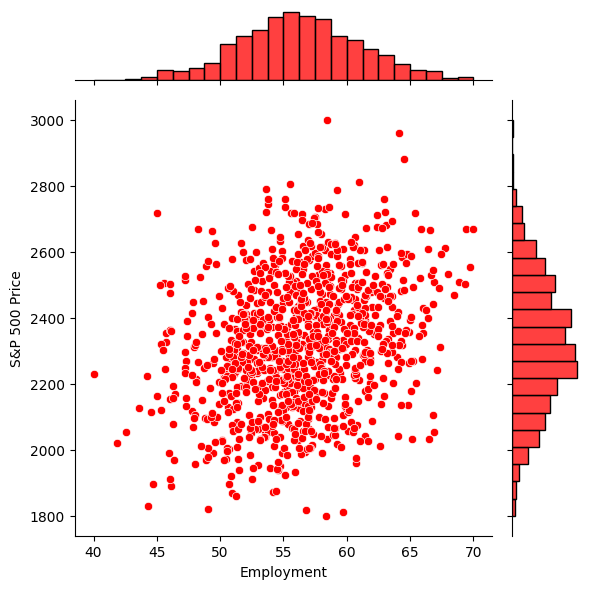

In [ ]:

import warnings
warnings.filterwarnings('ignore')

sns.jointplot(x='Interest Rates', y='S&P 500 Price', data=df, color='green',)



sns.jointplot(x='Employment', y='S&P 500 Price', data=df, color='red')



plt.tight_layout()
plt.show()

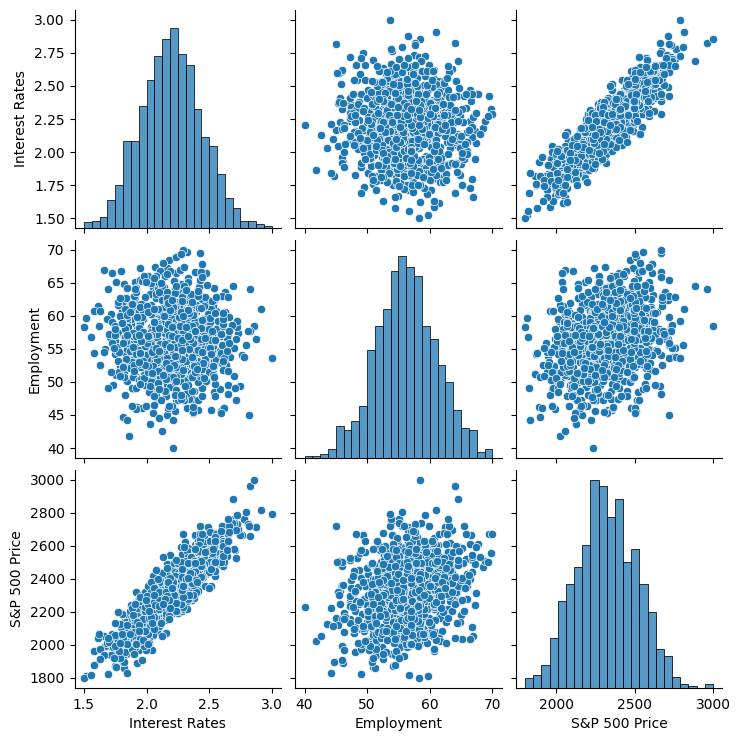

In [ ]:
sns.pairplot(df)


#

# *3.Split dataset to tran and test*

In [ ]:
from sklearn.model_selection import train_test_split

X=df[['Interest Rates','Employment']]
Y=df['S&P 500 Price']

X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(700, 2) (300, 2) (700,) (300,)


#

# *4.Model Training*

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train,Y_train)
print('Intercept is : ' ,model.intercept_)
print('Slope is : ' ,model.coef_)


Intercept is :  45.00417911318891
Slope is :  [721.4539297   12.27052185]


#

# *5.Evaluate the model*

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([2323.5198828 , 2223.78588426, 2776.57559553, 2100.94593596,
       1979.51183825, 2476.66152695, 2502.24056091, 2539.61082461,
       2090.13609841, 2040.13339976, 2155.19165649, 2450.01771101,
       2276.64856995, 2275.47793281, 2217.07245256, 2304.1279404 ,
       2237.21883701, 2370.62700489, 2258.75805598, 2436.24127906,
       2207.25066097, 2408.90746366, 2500.78382068, 2485.69163886,
       2056.51867917, 2331.25150282, 2401.00464691, 1973.115372  ,
       2493.84823614, 2322.89244672, 2408.40543254, 2212.17805014,
       2146.75859376, 2064.57987605, 2313.89112831, 2669.00902556,
       2084.41239626, 2455.41155334, 2478.54151899, 2332.60350515,
       2177.56911554, 2374.71036079, 2483.58196813, 2472.45552373,
       2104.66498087, 2548.38763824, 2211.67211739, 2085.12057459,
       2115.77859299, 2258.07426553, 2372.64174626, 2408.98792988,
       2171.75321801, 2334.94774017, 2249.99466124, 2249.64129992,
       2356.09583569, 2484.54095875, 2584.07060374, 2238.54178

Text(0.5, 1.0, 'Predictions')

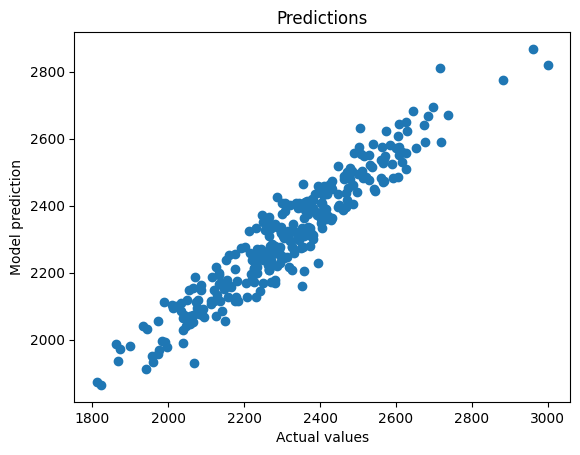

In [ ]:
plt.scatter(Y_test,y_pred)
plt.ylabel('Model prediction')
plt.xlabel('Actual values')
plt.title('Predictions')

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
RMSE=float(format(np.sqrt(mean_squared_error(Y_test,y_pred)),'.3f'))
MSE= mean_squared_error(Y_test,y_pred)
MAE=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
MAPE=np.mean(np.abs((Y_test-y_pred)/Y_test))*100
k=X_test.shape[1]
n=len(X_test)
adj_r2=1-(1-r2)*(n-1)/n-k-1

print(' RMSE :',RMSE,'\n','MSE :',MSE,'\n','MAE : ', MAE,'\n','R2 : ',r2,'\n','MAPE : ',MAPE)

 RMSE : 61.071 
 MSE : 3729.6376070004585 
 MAE :  49.05075654663446 
 R2 :  0.9045631518207793 
 MAPE :  2.130006339217279


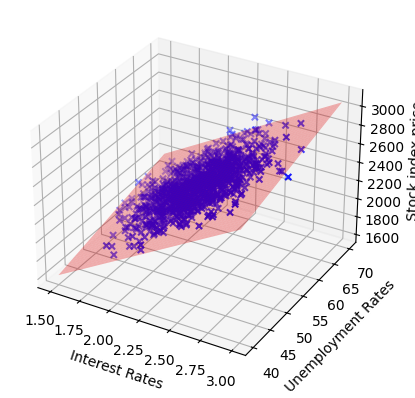

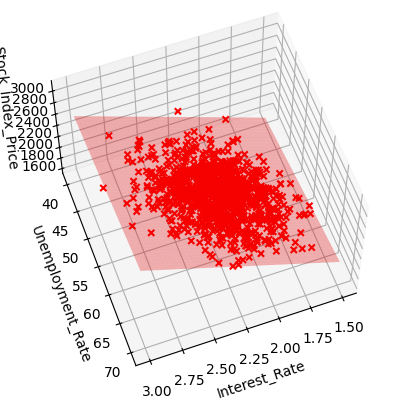

,Coefficient
Interest Rates,721.453930
Employment,12.270522


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid( np.linspace( df['Interest Rates'].min(), df['Interest Rates'].max(), 100),  np.linspace(df['Employment'].min(), df['Employment'].max() , 100))

onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()    } )

fittedY = model.predict(onlyX)

fittedY = fittedY.reshape(x_surf.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( df['Interest Rates'], df['Employment'] , df['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Interest Rates'],df['Employment'],df['S&P 500 Price'],c='red', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

